In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import graph as g
import survival as s

In [2]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df.info() # 4 int64, 5 float64, 6 object, 2 bool

''' 
object - sex, embarked, class, who, deck, embark_town, alive
bool - adult_male, alone

we can convert bool to int {i.e. 0(False) and 1(True)}
and object like sex,alive to int 

 '''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


' \nobject - sex, embarked, class, who, deck, embark_town, alive\nbool - adult_male, alone\n\nwe can convert bool to int {i.e. 0(False) and 1(True)}\nand object like sex,alive to int \n\n '

In [4]:
df.describe()

# total passenger count 891
# age mean 29.7 (smallest child - 0.42, oldest - 80)
# sibling/spouse count max 8
# parent/child count max 6
# fare max 512.33, mean 32.20


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

# deck has maximum missing values 688
# age has 177 missing values
# embark_town has 2 missing values


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## Data Cleaning

1. lets remove deck column as it missing more than 50% of its data and is not to usefull
2. lets also remove columns embark_town,class as data match with embarked and pclass
3. we will also drop 2 rows whoes values is missing 



### filling ages

In [6]:
df['age'].median()

np.float64(28.0)

In [7]:
df['age'].mean()

np.float64(29.69911764705882)

In [8]:
# as both median and mean are close we can use any of them to fill missing age values
df['age']= df['age'].fillna(df['age'].median())

In [9]:
df=df.drop(columns=['deck','embark_town','class','alive'])
df=df.dropna()

In [10]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,man,True,True
887,1,1,female,19.0,0,0,30.0000,S,woman,False,True
888,0,3,female,28.0,1,2,23.4500,S,woman,False,False
889,1,1,male,26.0,0,0,30.0000,C,man,True,True


In [11]:
# now lets convert sex and alive columns to int
df['sex']= df['sex'].map({'male':0,'female':1})

# lets convert bool columns to int
df['adult_male']= df['adult_male'].astype(int)
df['alone']= df['alone'].astype(int)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    889 non-null    int64  
 1   pclass      889 non-null    int64  
 2   sex         889 non-null    int64  
 3   age         889 non-null    float64
 4   sibsp       889 non-null    int64  
 5   parch       889 non-null    int64  
 6   fare        889 non-null    float64
 7   embarked    889 non-null    object 
 8   who         889 non-null    object 
 9   adult_male  889 non-null    int64  
 10  alone       889 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 83.3+ KB


# analysis


In [13]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,0,22.0,1,0,7.2500,S,man,1,0
1,1,1,1,38.0,1,0,71.2833,C,woman,0,0
2,1,3,1,26.0,0,0,7.9250,S,woman,0,1
3,1,1,1,35.0,1,0,53.1000,S,woman,0,0
4,0,3,0,35.0,0,0,8.0500,S,man,1,1


## before disatar

/home/dushyant-kumar-gedam/Desktop/Coding/projects/titanic/graph.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=data_df, palette='pastel')


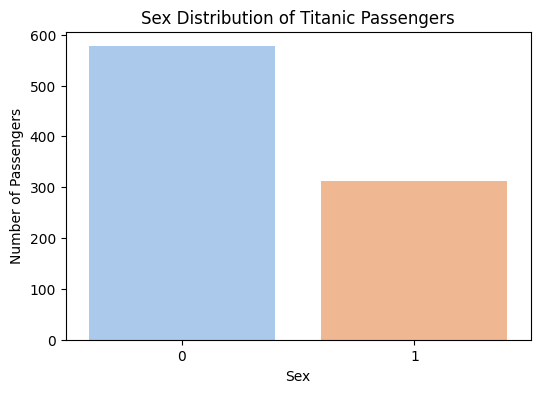

In [14]:
g.sex_graph(df)

## after disater


In [15]:
df_after = df[df['survived'] == 1].copy()
df_after = df_after.reset_index(drop=True)
df_after

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,1,1,1,38.0,1,0,71.2833,C,woman,0,0
1,1,3,1,26.0,0,0,7.9250,S,woman,0,1
2,1,1,1,35.0,1,0,53.1000,S,woman,0,0
3,1,3,1,27.0,0,2,11.1333,S,woman,0,0
4,1,2,1,14.0,1,0,30.0708,C,child,0,0
...,...,...,...,...,...,...,...,...,...,...,...
335,1,3,1,15.0,0,0,7.2250,C,child,0,1
336,1,1,1,56.0,0,1,83.1583,C,woman,0,0
337,1,2,1,25.0,0,1,26.0000,S,woman,0,0
338,1,1,1,19.0,0,0,30.0000,S,woman,0,1


# analysis
## survival rate 
1. women

In [16]:
# survival percentage of women and man
survival_percent = df.groupby('sex')['survived'].mean() * 100
survival_percent

# men have survival rate of 18.89%
# women have survival rate of 74.20%



sex
0    18.890815
1    74.038462
Name: survived, dtype: float64

In [17]:
# women per class survival rate

women = df[df['sex'] == 1]

survival_women_by_class = women.groupby('pclass')['survived'].mean() * 100
survival_women_by_class


pclass
1    96.739130
2    92.105263
3    50.000000
Name: survived, dtype: float64

In [18]:
# survival of woman vs child vs man

women_child_man= df.groupby('who')['survived']
women_child_man.mean() * 100

who
child    59.036145
man      16.387337
woman    75.464684
Name: survived, dtype: float64

2. age

In [19]:
# survival by age
df['age_group'] = pd.cut(df['age'], bins = [0, 12, 18, 40, 100], labels = ['child', 'teen', 'adult', 'senior'])
age_group_survival = df.groupby('age_group')['survived'].mean() * 100
age_group_survival

/tmp/ipykernel_864948/693397716.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival = df.groupby('age_group')['survived'].mean() * 100


age_group
child     57.971014
teen      42.857143
adult     35.940100
senior    36.241611
Name: survived, dtype: float64

In [20]:
# surviavl by age group and pclass
df.groupby(['age_group', 'pclass'])['survived'].mean() * 100

/tmp/ipykernel_864948/3950252725.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['age_group', 'pclass'])['survived'].mean() * 100


age_group  pclass
child      1          75.000000
           2         100.000000
           3          41.666667
teen       1          91.666667
           2          50.000000
           3          28.260870
adult      1          66.666667
           2          42.148760
           3          23.249300
senior     1          50.666667
           2          38.235294
           3           7.500000
Name: survived, dtype: float64

In [21]:
# survival percentage of women by age group
women = df[df['sex'] == 1]
women.groupby('age_group')['survived'].mean() * 100

/tmp/ipykernel_864948/3887093253.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  women.groupby('age_group')['survived'].mean() * 100


age_group
child     59.375000
teen      75.000000
adult     75.634518
senior    76.595745
Name: survived, dtype: float64

In [22]:
# for men vs age group survival
men = df[df['sex'] == 0]
men.groupby('age_group')['survived'].mean() * 100

/tmp/ipykernel_864948/1595041904.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  men.groupby('age_group')['survived'].mean() * 100


age_group
child     56.756757
teen       8.823529
adult     16.584158
senior    17.647059
Name: survived, dtype: float64

In [23]:
df.groupby('survived')['age'].mean()

survived
0    30.028233
1    28.163735
Name: age, dtype: float64

3.other

In [24]:
df.groupby('embarked')['survived'].mean() * 100


embarked
C    55.357143
Q    38.961039
S    33.695652
Name: survived, dtype: float64

In [25]:
df['family_size'] = df['sibsp'] + df['parch'] + 1
df.groupby('family_size')['survived'].mean() * 100

family_size
1     30.093458
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: survived, dtype: float64

In [26]:
df.groupby('survived')['fare'].mean()


survived
0    22.117887
1    48.209498
Name: fare, dtype: float64

In [27]:
df['fare_group'] = pd.qcut(df['fare'], 4)
df.groupby('fare_group')['survived'].mean() * 100


/tmp/ipykernel_864948/2138381682.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('fare_group')['survived'].mean() * 100


fare_group
(-0.001, 7.896]    19.730942
(7.896, 14.454]    30.357143
(14.454, 31.0]     45.495495
(31.0, 512.329]    57.727273
Name: survived, dtype: float64